In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

# Define file paths
files = {
    'benign': ['Preprocessed_EVSE-A-Charging-Benign.csv', 'Preprocessed_EVSE-A-idle-benign.csv'],
    'attack': [
        'Preprocessed_EVSE-A-charging-Aggressive-scan.csv',
        'Preprocessed_EVSE-A-charging-icmp-flood.csv',
        'Preprocessed_EVSE-A-charging-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-charging-portscan.csv',
        'Preprocessed_EVSE-A-charging-push-ack-flood.csv',
        'Preprocessed_EVSE-A-charging-service-detection.csv',
        'Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
        'Preprocessed_EVSE-A-charging-syn-flood.csv',
        'Preprocessed_EVSE-A-charging-synonymous-ip.csv',
        'Preprocessed_EVSE-A-charging-syn-stealth.csv',
        'Preprocessed_EVSE-A-charging-tcp-flood.csv',
        'Preprocessed_EVSE-A-charging-udp-flood.csv',
        'Preprocessed_EVSE-A-charging-vulnerability-scan.csv',
        'Preprocessed_EVSE-A-idle-aggressive-scan.csv',
        'Preprocessed_EVSE-A-idle-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-idle-portscan.csv',
        'Preprocessed_EVSE-A-idle-service-detection.csv',
        'Preprocessed_EVSE-A-idle-slowloris-scan.csv',
        'Preprocessed_EVSE-A-idle-syn-stealth-scan.csv',
        'Preprocessed_EVSE-A-idle-tcp-flood.csv',
        'Preprocessed_EVSE-A-idle-udp-flood.csv',
        'Preprocessed_EVSE-A-idle-vulnerability-scan.csv'
    ]
}

# Load and merge datasets
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if not os.path.exists(file_path):
            print(f"Warning: File not found - {file_path}")
            continue
        df = pd.read_csv(file_path, low_memory=False)  # Prevent dtype warning
        print(f"Loaded {file}: {df.shape}")  # Debugging
        df['Label'] = label  # 0 for benign, 1 for attack
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

benign_df = load_data(files['benign'], 0)
attack_df = load_data(files['attack'], 1)

# Combine both datasets
data = pd.concat([benign_df, attack_df], ignore_index=True)

# Debugging statements
print(f"Dataset shape: {data.shape}")
print(f"Columns: {data.columns}")
print(f"Missing values:\n{data.isnull().sum()}")

# Handle missing values
data = data.dropna(thresh=int(0.5 * data.shape[1]))  # Keep rows with at least 50% non-null values

# Drop non-numeric columns (if any)
data = data.select_dtypes(include=[np.number])

# Ensure Label column is not dropped
if 'Label' not in data.columns:
    raise ValueError("Error: 'Label' column is missing after preprocessing.")

# Ensure dataset is not empty
if data.empty:
    raise ValueError("Error: The dataset is empty after preprocessing.")

# Split features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Loaded Preprocessed_EVSE-A-Charging-Benign.csv: (14, 91)
Loaded Preprocessed_EVSE-A-idle-benign.csv: (68, 91)
Loaded Preprocessed_EVSE-A-charging-Aggressive-scan.csv: (9999, 91)
Loaded Preprocessed_EVSE-A-charging-icmp-flood.csv: (2, 91)
Loaded Preprocessed_EVSE-A-charging-icmp-fragmentation.csv: (11, 91)
Loaded Preprocessed_EVSE-A-charging-os-fingerprinting.csv: (4764, 91)
Loaded Preprocessed_EVSE-A-charging-portscan.csv: (8117, 91)
Loaded Preprocessed_EVSE-A-charging-push-ack-flood.csv: (65536, 91)
Loaded Preprocessed_EVSE-A-charging-service-detection.csv: (3629, 91)
Loaded Preprocessed_EVSE-A-charging-slowLoris-scan.csv: (1966, 91)
Loaded Preprocessed_EVSE-A-charging-syn-flood.csv: (65558, 91)
Loaded Preprocessed_EVSE-A-charging-synonymous-ip.csv: (65548, 91)
Loaded Preprocessed_EVSE-A-charging-syn-stealth.csv: (8032, 91)
Loaded Preprocessed_EVSE-A-charging-tcp-flood.csv: (65547, 91)
Loaded Preprocessed_EVSE-A-charging-udp-flood.csv: (7885, 91)
Loaded Preprocessed_EVSE-A-charging-vu

In [9]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

# Define file paths
files = {
    'benign': ['Preprocessed_EVSE-A-Charging-Benign.csv', 'Preprocessed_EVSE-A-idle-benign.csv'],
    'attack': [
        'Preprocessed_EVSE-A-charging-Aggressive-scan.csv',
        'Preprocessed_EVSE-A-charging-icmp-flood.csv',
        'Preprocessed_EVSE-A-charging-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-charging-portscan.csv',
        'Preprocessed_EVSE-A-charging-push-ack-flood.csv',
        'Preprocessed_EVSE-A-charging-service-detection.csv',
        'Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
        'Preprocessed_EVSE-A-charging-syn-flood.csv',
        'Preprocessed_EVSE-A-charging-synonymous-ip.csv',
        'Preprocessed_EVSE-A-charging-syn-stealth.csv',
        'Preprocessed_EVSE-A-charging-tcp-flood.csv',
        'Preprocessed_EVSE-A-charging-udp-flood.csv',
        'Preprocessed_EVSE-A-charging-vulnerability-scan.csv',
        'Preprocessed_EVSE-A-idle-aggressive-scan.csv',
        'Preprocessed_EVSE-A-idle-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-idle-portscan.csv',
        'Preprocessed_EVSE-A-idle-service-detection.csv',
        'Preprocessed_EVSE-A-idle-slowloris-scan.csv',
        'Preprocessed_EVSE-A-idle-syn-stealth-scan.csv',
        'Preprocessed_EVSE-A-idle-tcp-flood.csv',
        'Preprocessed_EVSE-A-idle-udp-flood.csv',
        'Preprocessed_EVSE-A-idle-vulnerability-scan.csv'
    ]
}

# Load and merge datasets
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if not os.path.exists(file_path):
            print(f"Warning: File not found - {file_path}")
            continue
        df = pd.read_csv(file_path, low_memory=False)
        df['Label'] = label
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

benign_df = load_data(files['benign'], 0)
attack_df = load_data(files['attack'], 1)

# Combine both datasets
data = pd.concat([benign_df, attack_df], ignore_index=True)

# Handle missing values
data = data.dropna(thresh=int(0.5 * data.shape[1]))
data = data.select_dtypes(include=[np.number])

if 'Label' not in data.columns:
    raise ValueError("Error: 'Label' column is missing after preprocessing.")

if data.empty:
    raise ValueError("Error: The dataset is empty after preprocessing.")

# Split features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Decision Tree": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Adaboost": AdaBoostClassifier(algorithm="SAMME"),
    "MLP": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

# Convert to DataFrame and format output
results_df = pd.DataFrame(results)
results_df = results_df.set_index("Model").round(5)

print(results_df)


                     Accuracy  F1-score  Precision   Recall
Model                                                      
Decision Tree         1.00000   1.00000        1.0  1.00000
KNN                   1.00000   1.00000        1.0  1.00000
Adaboost              1.00000   1.00000        1.0  1.00000
MLP                   1.00000   1.00000        1.0  1.00000
Naive Bayes           0.99992   0.99996        1.0  0.99992
Logistic Regression   1.00000   1.00000        1.0  1.00000
Random Forest         1.00000   1.00000        1.0  1.00000


In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

# Define file paths
files = {
    'benign': ['Preprocessed_EVSE-A-Charging-Benign.csv', 'Preprocessed_EVSE-A-idle-benign.csv'],
    'attack': [
        'Preprocessed_EVSE-A-charging-Aggressive-scan.csv',
        'Preprocessed_EVSE-A-charging-icmp-flood.csv',
        'Preprocessed_EVSE-A-charging-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-charging-portscan.csv',
        'Preprocessed_EVSE-A-charging-push-ack-flood.csv',
        'Preprocessed_EVSE-A-charging-service-detection.csv',
        'Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
        'Preprocessed_EVSE-A-charging-syn-flood.csv',
        'Preprocessed_EVSE-A-charging-synonymous-ip.csv',
        'Preprocessed_EVSE-A-charging-syn-stealth.csv',
        'Preprocessed_EVSE-A-charging-tcp-flood.csv',
        'Preprocessed_EVSE-A-charging-udp-flood.csv',
        'Preprocessed_EVSE-A-charging-vulnerability-scan.csv',
        'Preprocessed_EVSE-A-idle-aggressive-scan.csv',
        'Preprocessed_EVSE-A-idle-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-idle-portscan.csv',
        'Preprocessed_EVSE-A-idle-service-detection.csv',
        'Preprocessed_EVSE-A-idle-slowloris-scan.csv',
        'Preprocessed_EVSE-A-idle-syn-stealth-scan.csv',
        'Preprocessed_EVSE-A-idle-tcp-flood.csv',
        'Preprocessed_EVSE-A-idle-udp-flood.csv',
        'Preprocessed_EVSE-A-idle-vulnerability-scan.csv'
    ]
}

# Load and merge datasets
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if not os.path.exists(file_path):
            print(f"Warning: File not found - {file_path}")
            continue
        df = pd.read_csv(file_path, low_memory=False)
        df['Label'] = label
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

benign_df = load_data(files['benign'], 0)
attack_df = load_data(files['attack'], 1)

# Combine both datasets
data = pd.concat([benign_df, attack_df], ignore_index=True)

# Handle missing values
data = data.dropna(thresh=int(0.5 * data.shape[1]))
data = data.select_dtypes(include=[np.number])

# Check for duplicate data
duplicates = data.duplicated().sum()
print(f"Duplicate entries: {duplicates}")

if 'Label' not in data.columns:
    raise ValueError("Error: 'Label' column is missing after preprocessing.")

if data.empty:
    raise ValueError("Error: The dataset is empty after preprocessing.")

# Split features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Print dataset stats
print("Dataset Shape:", X.shape)
print("Class Distribution:\n", y.value_counts())
print("Feature Summary:\n", data.describe())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Decision Tree": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Adaboost": AdaBoostClassifier(algorithm="SAMME"),
    "MLP": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "CV Accuracy Mean": scores.mean(),
        "CV Accuracy Std": scores.std()
    })

# Convert to DataFrame and format output
results_df = pd.DataFrame(results)
results_df = results_df.set_index("Model").round(5)

print(results_df)


Duplicate entries: 0
Dataset Shape: (416760, 77)
Class Distribution:
 Label
1    416678
0        82
Name: count, dtype: int64
Feature Summary:
                 time         counts    extra_col_6   extra_col_10  \
count  416760.000000  416760.000000  416760.000000  416760.000000   
mean    26497.300166       0.000163   35688.350250    2781.518116   
std     20681.757655       0.012773   18166.965879    9509.098250   
min         0.000000       0.000000       0.000000       0.000000   
25%      6132.000000       0.000000   20820.000000      80.000000   
50%     23869.000000       0.000000   37469.000000      80.000000   
75%     44707.000000       0.000000   50765.250000      80.000000   
max     65557.000000       1.000000   65535.000000   65535.000000   

        extra_col_11   extra_col_12  extra_col_13  extra_col_14  extra_col_15  \
count  416760.000000  416760.000000      416760.0      416760.0  4.167600e+05   
mean        6.422430       4.000014           0.0           0.0  1.70320

Duplicate entries: 0
Dataset Shape: (416760, 77)
Class Distribution:
 Label
1    416678
0        82
Name: count, dtype: int64
Feature Summary:
                 time         counts    extra_col_6   extra_col_10  \
count  416760.000000  416760.000000  416760.000000  416760.000000   
mean    26497.300166       0.000163   35688.350250    2781.518116   
std     20681.757655       0.012773   18166.965879    9509.098250   
min         0.000000       0.000000       0.000000       0.000000   
25%      6132.000000       0.000000   20820.000000      80.000000   
50%     23869.000000       0.000000   37469.000000      80.000000   
75%     44707.000000       0.000000   50765.250000      80.000000   
max     65557.000000       1.000000   65535.000000   65535.000000   

        extra_col_11   extra_col_12  extra_col_13  extra_col_14  extra_col_15  \
count  416760.000000  416760.000000      416760.0      416760.0  4.167600e+05   
mean        6.422430       4.000014           0.0           0.0  1.70320

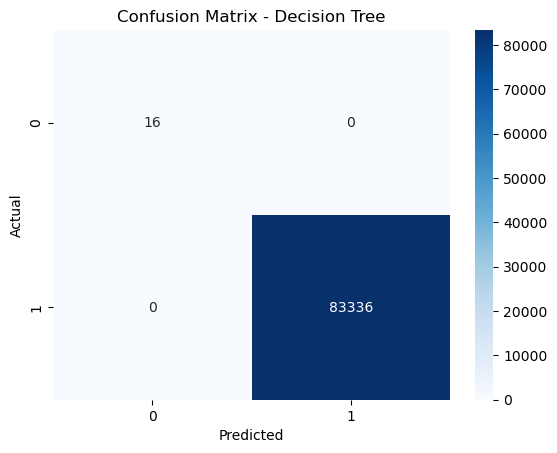

In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Define dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

# Define file paths
files = {
    'benign': ['Preprocessed_EVSE-A-Charging-Benign.csv', 'Preprocessed_EVSE-A-idle-benign.csv'],
    'attack': [
        'Preprocessed_EVSE-A-charging-Aggressive-scan.csv',
        'Preprocessed_EVSE-A-charging-icmp-flood.csv',
        'Preprocessed_EVSE-A-charging-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-charging-portscan.csv',
        'Preprocessed_EVSE-A-charging-push-ack-flood.csv',
        'Preprocessed_EVSE-A-charging-service-detection.csv',
        'Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
        'Preprocessed_EVSE-A-charging-syn-flood.csv',
        'Preprocessed_EVSE-A-charging-synonymous-ip.csv',
        'Preprocessed_EVSE-A-charging-syn-stealth.csv',
        'Preprocessed_EVSE-A-charging-tcp-flood.csv',
        'Preprocessed_EVSE-A-charging-udp-flood.csv',
        'Preprocessed_EVSE-A-charging-vulnerability-scan.csv',
        'Preprocessed_EVSE-A-idle-aggressive-scan.csv',
        'Preprocessed_EVSE-A-idle-icmp-fragmentation.csv',
        'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
        'Preprocessed_EVSE-A-idle-portscan.csv',
        'Preprocessed_EVSE-A-idle-service-detection.csv',
        'Preprocessed_EVSE-A-idle-slowloris-scan.csv',
        'Preprocessed_EVSE-A-idle-syn-stealth-scan.csv',
        'Preprocessed_EVSE-A-idle-tcp-flood.csv',
        'Preprocessed_EVSE-A-idle-udp-flood.csv',
        'Preprocessed_EVSE-A-idle-vulnerability-scan.csv'
    ]
}

# Load and merge datasets
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if not os.path.exists(file_path):
            print(f"Warning: File not found - {file_path}")
            continue
        df = pd.read_csv(file_path, low_memory=False)
        df['Label'] = label
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

benign_df = load_data(files['benign'], 0)
attack_df = load_data(files['attack'], 1)

# Combine both datasets
data = pd.concat([benign_df, attack_df], ignore_index=True)

# Handle missing values
data = data.dropna(thresh=int(0.5 * data.shape[1]))
data = data.select_dtypes(include=[np.number])

# Check for duplicate data
duplicates = data.duplicated().sum()
print(f"Duplicate entries: {duplicates}")

if 'Label' not in data.columns:
    raise ValueError("Error: 'Label' column is missing after preprocessing.")

if data.empty:
    raise ValueError("Error: The dataset is empty after preprocessing.")

# Split features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Print dataset stats
print("Dataset Shape:", X.shape)
print("Class Distribution:\n", y.value_counts())
print("Feature Summary:\n", data.describe())

# Check class imbalance
print("Class Distribution:", y.value_counts(normalize=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Decision Tree": RandomForestClassifier(n_estimators=100, random_state=42),
    
   
}

# Store results
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "CV Accuracy Mean": scores.mean(),
        "CV Accuracy Std": scores.std()
    })

# Convert to DataFrame and format output
results_df = pd.DataFrame(results)
results_df = results_df.set_index("Model").round(5)
print(results_df)

# Generate confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Class distribution before SMOTE: Counter({1: 1900644, 0: 222511})
Class distribution after SMOTE: Counter({1: 1900644, 0: 1900644})
Training Random Forest...

===== Random Forest RESULTS =====
Accuracy: 1.00
Class                     Precision  Recall     F1-score   Support   
Attack                    1.00       1.00       1.00       55628     
Benign                    1.00       1.00       1.00       475161    



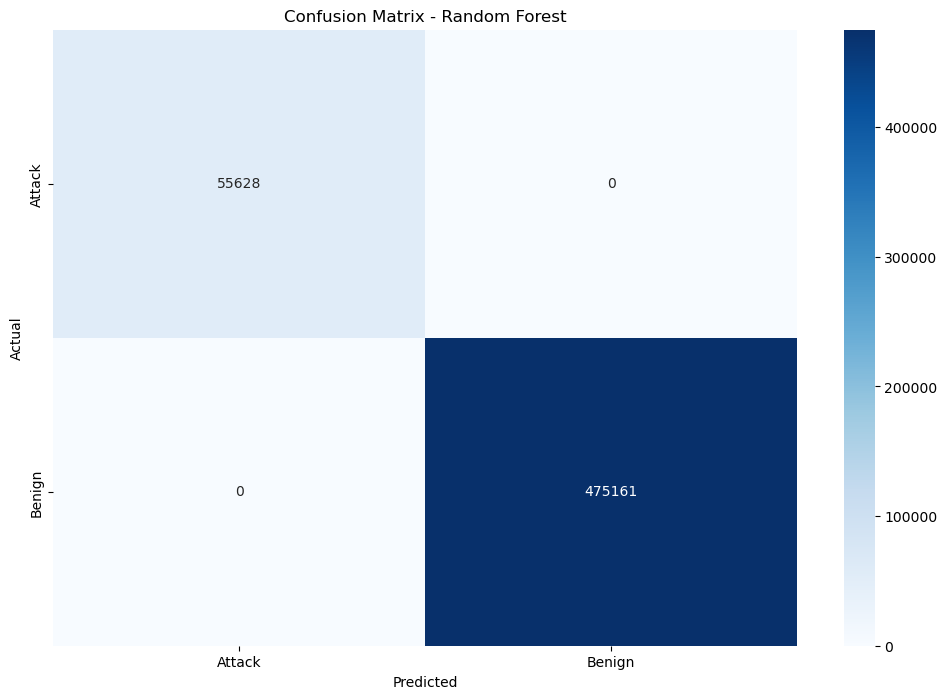

In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from joblib import Parallel, delayed
from collections import Counter

# Define dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

# Define multi-class attack file mapping
files = {
    'Benign': ['Preprocessed_EVSE-A-Charging-Benign.csv', 'Preprocessed_EVSE-A-idle-benign.csv',
               'Preprocessed_EVSE-B-charging-benign.csv', 'Preprocessed_EVSE-B-idle-benign_updated.csv',
              ],
    
     'Attack': [
        'Preprocessed_EVSE-A-charging-icmp-flood.csv',
        'Preprocessed_EVSE-A-charging-push-ack-flood.csv',
        'Preprocessed_EVSE-A-charging-syn-flood.csv',
        'Preprocessed_EVSE-A-charging-tcp-flood.csv',
        'Preprocessed_EVSE-A-charging-udp-flood.csv',
        'Preprocessed_EVSE-A-idle-tcp-flood.csv',
        'Preprocessed_EVSE-A-idle-udp-flood.csv',
    ]
}

# Function to load data and assign labels
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

# Load all data
data_list = [load_data(file_list, label) for label, file_list in files.items()]

# Combine all datasets
data = pd.concat(data_list, ignore_index=True)

# Ensure 'Label' column is not removed
label_column = data['Label']
data = data.select_dtypes(include=[np.number])  # Keep only numeric features
data['Label'] = label_column  # Reattach the label column

# Remove columns that contain only missing values
data = data.dropna(axis=1, how='all')

# Handle missing values by filling them with median
imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])  # Exclude 'Label' column

# Drop rows with missing labels
data.dropna(subset=['Label'], inplace=True)

# Separate features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE with k_neighbors=1 to avoid errors
smote = SMOTE(random_state=42, k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train))

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
}

# Function to train and evaluate a model
def train_and_evaluate(model_name, model):
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the results
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Ensure target_names match the unique labels in y_test
    unique_labels = list(set(y_test))  # Get unique labels in the test set
    class_report = classification_report(y_test, y_pred, target_names=le.classes_[unique_labels], output_dict=True)

    result = f"\n===== {model_name} RESULTS =====\n"
    result += f"Accuracy: {accuracy:.2f}\n"
    result += "{:<25} {:<10} {:<10} {:<10} {:<10}\n".format("Class", "Precision", "Recall", "F1-score", "Support")
    result += "=" * 75 + "\n"

    # Print classification report
    for label in le.classes_:
        metrics = class_report[label]
        result += "{:<25} {:<10.2f} {:<10.2f} {:<10.2f} {:<10}\n".format(
            label, metrics["precision"], metrics["recall"], metrics["f1-score"], int(metrics["support"])
        )
    print(result)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train models sequentially to reduce memory usage
for name, model in models.items():
    train_and_evaluate(name, model)


Class distribution before balancing: Counter({6: 52446, 7: 52438, 8: 52437, 3: 52429, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})
Class distribution after balancing: Counter({6: 26223, 7: 26219, 8: 26218, 3: 26214, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})

Training Random Forest...

===== Random Forest RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy             

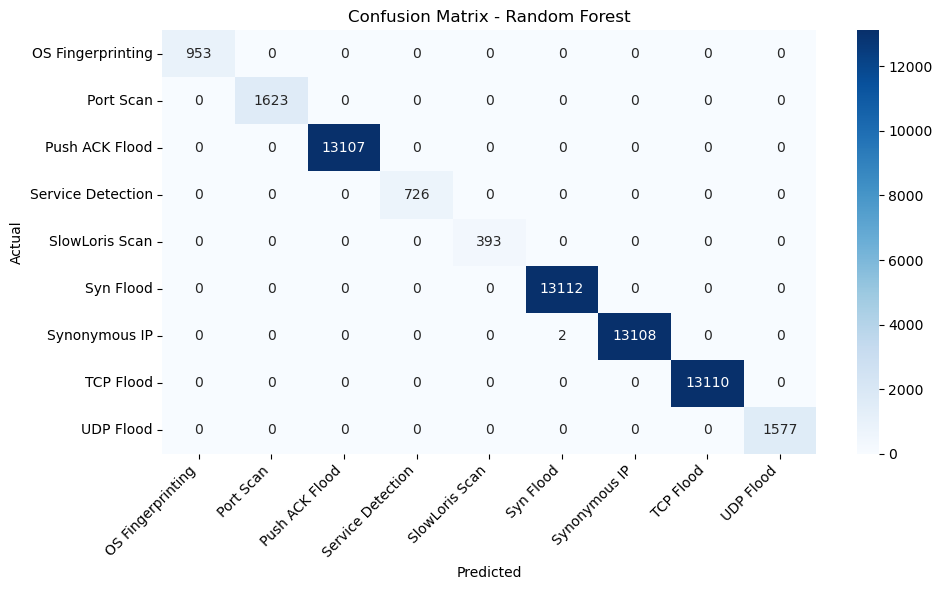


Training Gradient Boosting...

===== Gradient Boosting RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy                           1.00     57711
        macro avg       1.00      1.00      1.00     57711
     weighted avg       1.00      1.00      1.00     57711



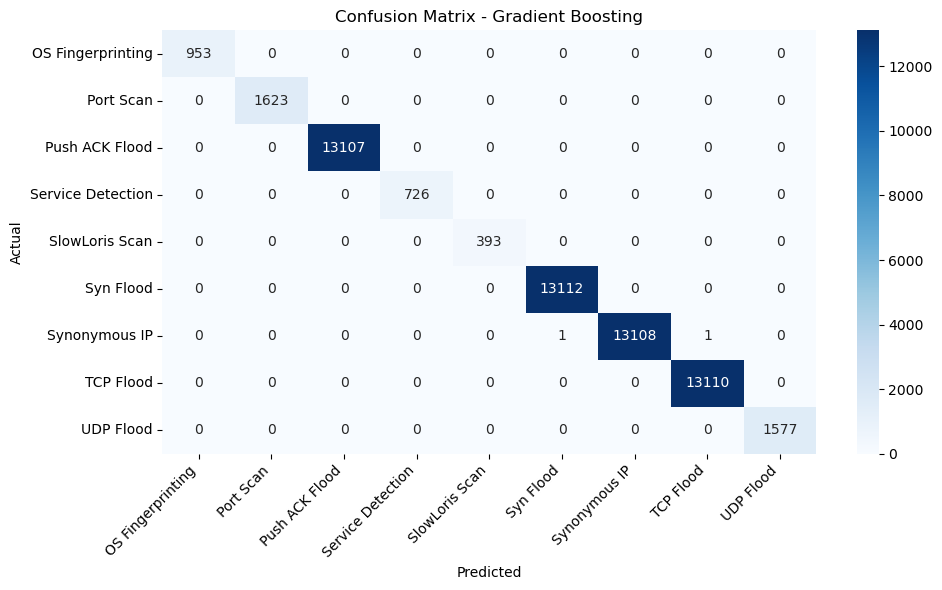


Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3937/3937 - 23s - 6ms/step - accuracy: 0.9712 - loss: 0.0775 - val_accuracy: 0.9989 - val_loss: 0.0341
Epoch 2/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9880 - loss: 0.0328 - val_accuracy: 0.9744 - val_loss: 0.0479
Epoch 3/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9927 - loss: 0.0209 - val_accuracy: 0.9953 - val_loss: 0.0236
Epoch 4/10
3937/3937 - 18s - 4ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9996 - val_loss: 0.0172
Epoch 5/10
3937/3937 - 18s - 5ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9997 - val_loss: 0.0095
Epoch 6/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9994 - val_loss: 0.0140
Epoch 7/10
3937/3937 - 19s - 5ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9997 - val_loss: 0.0116
Epoch 8/10
3937/3937 - 18s - 5ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9862 - val_loss: 0.0236
Epoch 9/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {
    'ICMP Flood': ['Preprocessed_EVSE-A-charging-icmp-flood.csv'],
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv'],
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv'],
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv'],
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv'],
    'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv'],
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv'],
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv'],
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv'],
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],
}

def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

data_list = [load_data(file_list, label) for label, file_list in files.items()]

if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")

data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

X = data.drop(columns=['Label'])
y = data['Label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Class distribution before balancing:", Counter(y_train))

# Define SMOTE and undersampling strategies
class_counts = Counter(y_train)
max_samples = max(class_counts.values())
smote_strategy = {cls: int(count * 1.5) for cls, count in class_counts.items() if count > 5}
undersample_strategy = {cls: int(count * 0.5) for cls, count in class_counts.items() if count > max_samples * 0.7}

# Apply SMOTE with k_neighbors=min(5, class_count - 1) to avoid errors
over_sample = BorderlineSMOTE(sampling_strategy=smote_strategy, k_neighbors=3, random_state=42)
X_train, y_train = over_sample.fit_resample(X_train, y_train)

# Apply undersampling after oversampling
under_sample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train, y_train = under_sample.fit_resample(X_train, y_train)

print("Class distribution after balancing:", Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
}

def train_and_evaluate(model_name, model):
    print(f"\nTraining {model_name}...\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    unique_labels = np.unique(y_test)
    valid_target_names = [le.classes_[label] for label in unique_labels]
    
    print(f"===== {model_name} RESULTS =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

for name, model in models.items():   
    train_and_evaluate(name, model)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

eval_results = dl_model.evaluate(X_test, y_test, verbose=2)
print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")


Class distribution before balancing: Counter({6: 52446, 7: 52438, 8: 52437, 3: 52429, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})
Class distribution after balancing: Counter({6: 26223, 7: 26219, 8: 26218, 3: 26214, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})

Training Random Forest...

===== Random Forest RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy             

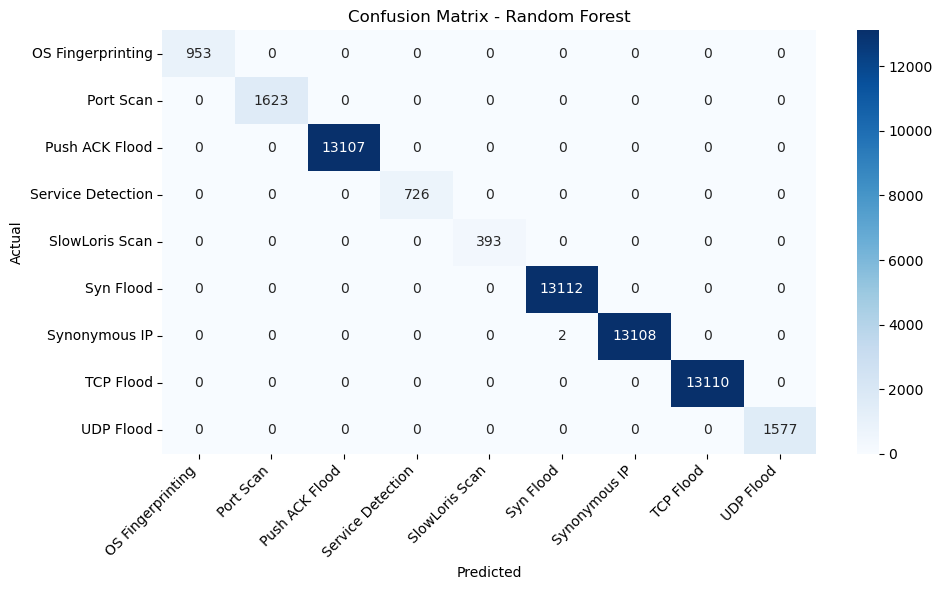


Training Gradient Boosting...

===== Gradient Boosting RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy                           1.00     57711
        macro avg       1.00      1.00      1.00     57711
     weighted avg       1.00      1.00      1.00     57711



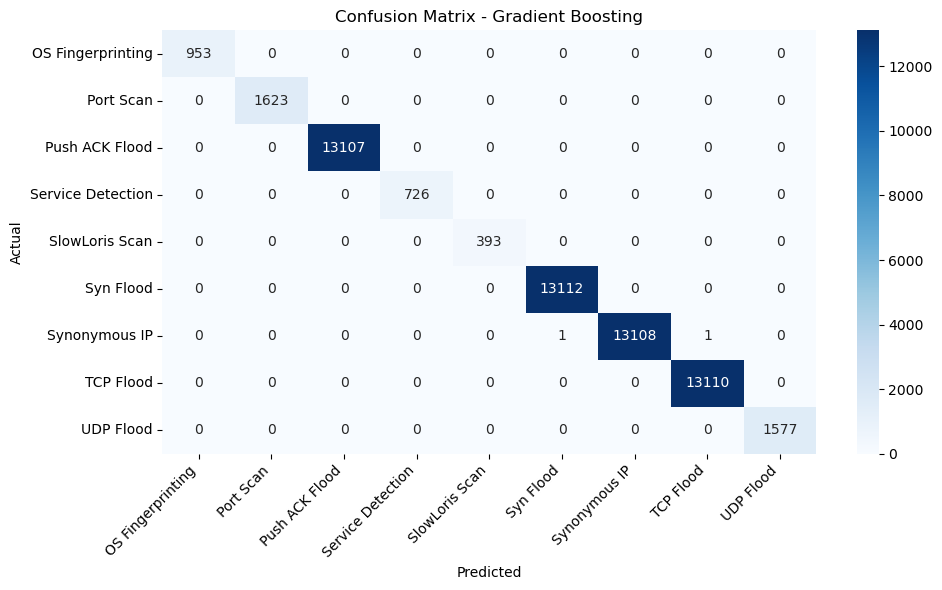


Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3937/3937 - 23s - 6ms/step - accuracy: 0.9708 - loss: 0.0801 - val_accuracy: 0.9716 - val_loss: 0.0897
Epoch 2/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9910 - loss: 0.0253 - val_accuracy: 0.9877 - val_loss: 0.0244
Epoch 3/10
3937/3937 - 18s - 4ms/step - accuracy: 0.9914 - loss: 0.0242 - val_accuracy: 0.9997 - val_loss: 0.0156
Epoch 4/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9925 - loss: 0.0209 - val_accuracy: 0.9997 - val_loss: 0.0127
Epoch 5/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9930 - loss: 0.0196 - val_accuracy: 0.9995 - val_loss: 0.0121
Epoch 6/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9823 - val_loss: 0.0331
Epoch 7/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9995 - val_loss: 0.0309
Epoch 8/10
3937/3937 - 19s - 5ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9998 - val_loss: 0.0135
Epoch 9/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {
    'ICMP Flood': ['Preprocessed_EVSE-A-charging-icmp-flood.csv'],
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv'],
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv'],
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv'],
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv'],
    'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv'],
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv'],
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv'],
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv'],
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],
}

def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

data_list = [load_data(file_list, label) for label, file_list in files.items()]

if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")

data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

X = data.drop(columns=['Label'])
y = data['Label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Class distribution before balancing:", Counter(y_train))

# Define SMOTE and undersampling strategies
class_counts = Counter(y_train)
max_samples = max(class_counts.values())
smote_strategy = {cls: int(count * 1.5) for cls, count in class_counts.items() if count > 5}
undersample_strategy = {cls: int(count * 0.5) for cls, count in class_counts.items() if count > max_samples * 0.7}

# Apply BorderlineSMOTE with k_neighbors set dynamically to avoid errors
over_sample = BorderlineSMOTE(sampling_strategy=smote_strategy, k_neighbors=min(2, min(class_counts.values()) - 1), random_state=42)
X_train, y_train = over_sample.fit_resample(X_train, y_train)

# Apply undersampling after oversampling
under_sample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train, y_train = under_sample.fit_resample(X_train, y_train)

print("Class distribution after balancing:", Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
}

def train_and_evaluate(model_name, model):
    print(f"\nTraining {model_name}...\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    unique_labels = np.unique(y_test)
    valid_target_names = [le.classes_[label] for label in unique_labels]
    
    print(f"===== {model_name} RESULTS =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

for name, model in models.items():   
    train_and_evaluate(name, model)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

eval_results = dl_model.evaluate(X_test, y_test, verbose=2)
print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")

Class distribution before balancing: Counter({7: 209755, 5: 104885, 2: 104876, 6: 52438, 8: 25980, 1: 10473, 0: 6705, 3: 2903, 4: 1573})
Class distribution after balancing: Counter({5: 157327, 7: 104877, 2: 104876, 6: 52438, 8: 25980, 1: 10473, 0: 6705, 3: 2903, 4: 1573})

Training Random Forest...

===== Random Forest RESULTS =====
Accuracy: 0.9998
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00      1676
        Port Scan       1.00      1.00      1.00      2619
   Push ACK Flood       1.00      1.00      1.00     26219
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     26221
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     52439
        UDP Flood       1.00      1.00      1.00      6495

         accuracy               

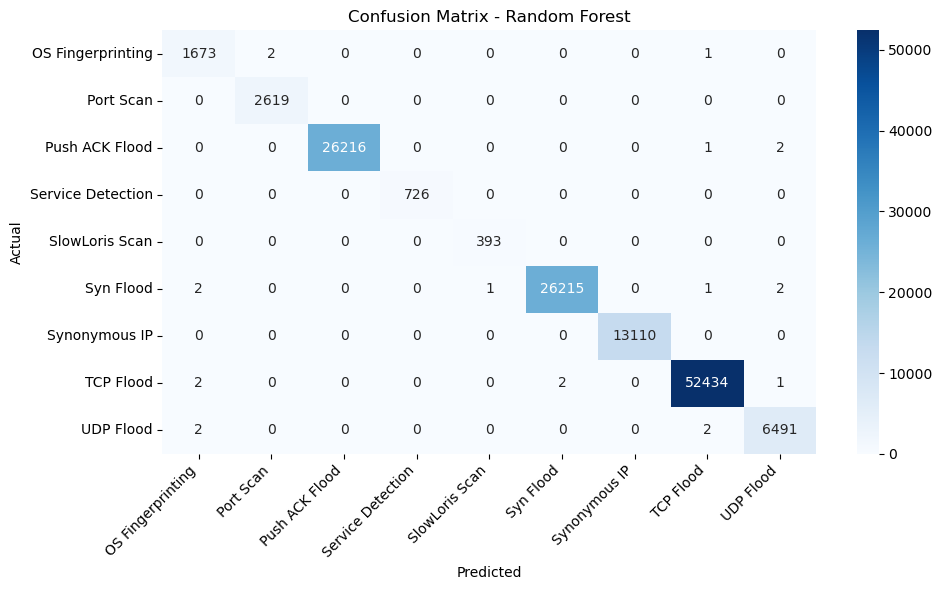

In [1]:
#running
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {
     'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv',
                  'Preprocessed_EVSE-B-charging-tcp-flood.csv',
                  'Preprocessed_EVSE-A-idle-tcp-flood.csv',
                  'Preprocessed_EVSE-B-idle-tcp-flood.csv'],
    
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv',
                  'Preprocessed_EVSE-B-charging-udp-flood.csv',
                  'Preprocessed_EVSE-A-idle-udp-flood.csv',
                  'Preprocessed_EVSE-B-idle-udp-flood.csv'],
    
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-charging-os-flood.csv',
                          'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-idle-os-flood.csv'],
    
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv',
                  'Preprocessed_EVSE-B-charging-portscan.csv',
                  'Preprocessed_EVSE-A-idle-portscan.csv',
                  'Preprocessed_EVSE-B-idle-portscan.csv'],

        'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv',
                           'Preprocessed_EVSE-B-charging-push-ack-flood.csv'],
    
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv',
                          'Preprocessed_EVSE-B-charging-service-detection.csv'],
    
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
                       'Preprocessed_EVSE-B-charging-slowLoris-scan.csv'],
    
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv',
                  'Preprocessed_EVSE-B-charging-syn-flood.csv'],
    
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],

}

def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

data_list = [load_data(file_list, label) for label, file_list in files.items()]

if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")

data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

X = data.drop(columns=['Label'])
y = data['Label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Class distribution before balancing:", Counter(y_train))

# Define SMOTE and undersampling strategies
class_counts = Counter(y_train)
max_samples = max(class_counts.values())
smote_strategy = {cls: int(count * 1.5) for cls, count in class_counts.items() if count > 5}
undersample_strategy = {cls: int(count * 0.5) for cls, count in class_counts.items() if count > max_samples * 0.7}

# Apply BorderlineSMOTE with k_neighbors set dynamically to avoid errors
over_sample = BorderlineSMOTE(sampling_strategy=smote_strategy, k_neighbors=min(2, min(class_counts.values()) - 1), random_state=42)
X_train, y_train = over_sample.fit_resample(X_train, y_train)

# Apply undersampling after oversampling
under_sample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train, y_train = under_sample.fit_resample(X_train, y_train)

print("Class distribution after balancing:", Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42, n_jobs=-1),
    
}

def train_and_evaluate(model_name, model):
    print(f"\nTraining {model_name}...\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    unique_labels = np.unique(y_test)
    valid_target_names = [le.classes_[label] for label in unique_labels]
    
    print(f"===== {model_name} RESULTS =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

for name, model in models.items():   
    train_and_evaluate(name, model)



Class distribution before balancing: Counter({6: 52446, 7: 52438, 8: 52437, 3: 52429, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})
Class distribution after balancing: Counter({6: 26223, 7: 26219, 8: 26218, 3: 26214, 2: 6494, 9: 6308, 1: 3811, 4: 2903, 5: 1573, 0: 2})

Training Random Forest...

===== Random Forest RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy             

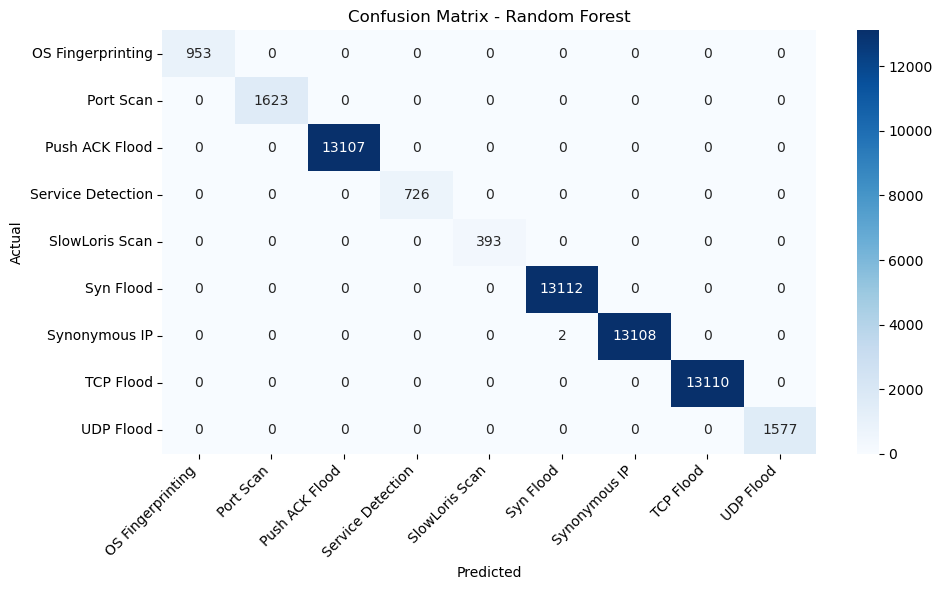


Training Gradient Boosting...

===== Gradient Boosting RESULTS =====
Accuracy: 1.0000
Classification Report:
                    precision    recall  f1-score   support

OS Fingerprinting       1.00      1.00      1.00       953
        Port Scan       1.00      1.00      1.00      1623
   Push ACK Flood       1.00      1.00      1.00     13107
Service Detection       1.00      1.00      1.00       726
   SlowLoris Scan       1.00      1.00      1.00       393
        Syn Flood       1.00      1.00      1.00     13112
    Synonymous IP       1.00      1.00      1.00     13110
        TCP Flood       1.00      1.00      1.00     13110
        UDP Flood       1.00      1.00      1.00      1577

         accuracy                           1.00     57711
        macro avg       1.00      1.00      1.00     57711
     weighted avg       1.00      1.00      1.00     57711



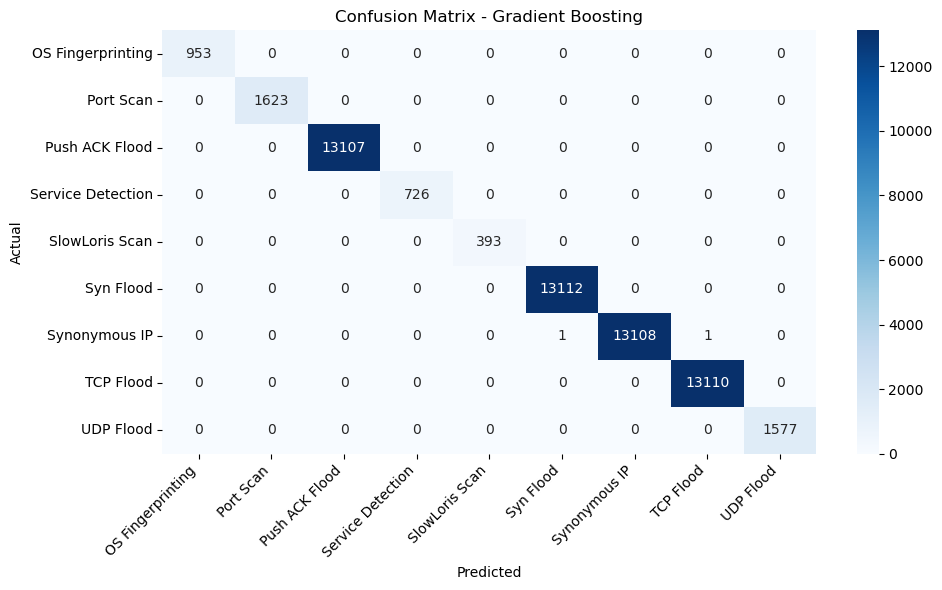


Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3937/3937 - 23s - 6ms/step - accuracy: 0.9708 - loss: 0.0801 - val_accuracy: 0.9716 - val_loss: 0.0897
Epoch 2/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9910 - loss: 0.0253 - val_accuracy: 0.9877 - val_loss: 0.0244
Epoch 3/10
3937/3937 - 18s - 4ms/step - accuracy: 0.9914 - loss: 0.0242 - val_accuracy: 0.9997 - val_loss: 0.0156
Epoch 4/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9925 - loss: 0.0209 - val_accuracy: 0.9997 - val_loss: 0.0127
Epoch 5/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9930 - loss: 0.0196 - val_accuracy: 0.9995 - val_loss: 0.0121
Epoch 6/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9823 - val_loss: 0.0331
Epoch 7/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9995 - val_loss: 0.0309
Epoch 8/10
3937/3937 - 19s - 5ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9998 - val_loss: 0.0135
Epoch 9/10
3937/3937 - 17s - 4ms/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {
    'ICMP Flood': ['Preprocessed_EVSE-A-charging-icmp-flood.csv'],
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv'],
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv'],
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv'],
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv'],
    'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv'],
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv'],
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv'],
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv'],
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],
}

def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

data_list = [load_data(file_list, label) for label, file_list in files.items()]

if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")

data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

X = data.drop(columns=['Label'])
y = data['Label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Class distribution before balancing:", Counter(y_train))

# Define SMOTE and undersampling strategies
class_counts = Counter(y_train)
max_samples = max(class_counts.values())
smote_strategy = {cls: int(count * 1.5) for cls, count in class_counts.items() if count > 5}
undersample_strategy = {cls: int(count * 0.5) for cls, count in class_counts.items() if count > max_samples * 0.7}

# Apply BorderlineSMOTE with k_neighbors set dynamically to avoid errors
over_sample = BorderlineSMOTE(sampling_strategy=smote_strategy, k_neighbors=min(2, min(class_counts.values()) - 1), random_state=42)
X_train, y_train = over_sample.fit_resample(X_train, y_train)

# Apply undersampling after oversampling
under_sample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train, y_train = under_sample.fit_resample(X_train, y_train)

print("Class distribution after balancing:", Counter(y_train))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
}

def train_and_evaluate(model_name, model):
    print(f"\nTraining {model_name}...\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    unique_labels = np.unique(y_test)
    valid_target_names = [le.classes_[label] for label in unique_labels]
    
    print(f"===== {model_name} RESULTS =====")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

for name, model in models.items():   
    train_and_evaluate(name, model)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

eval_results = dl_model.evaluate(X_test, y_test, verbose=2)
print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")


Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7214/7214 - 33s - 5ms/step - accuracy: 0.9832 - loss: 0.0451 - val_accuracy: 0.9873 - val_loss: 0.0286
Epoch 2/10
7214/7214 - 31s - 4ms/step - accuracy: 0.9922 - loss: 0.0202 - val_accuracy: 0.9996 - val_loss: 0.0115
Epoch 3/10
7214/7214 - 31s - 4ms/step - accuracy: 0.9950 - loss: 0.0140 - val_accuracy: 0.9997 - val_loss: 0.0132
Epoch 4/10
7214/7214 - 29s - 4ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9996 - val_loss: 0.0139
Epoch 5/10
7214/7214 - 27s - 4ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9996 - val_loss: 0.0130
Epoch 6/10
7214/7214 - 27s - 4ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9997 - val_loss: 0.0205
Epoch 7/10
7214/7214 - 30s - 4ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9811 - val_loss: 0.0316
Epoch 8/10
7214/7214 - 31s - 4ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9998 - val_loss: 0.0041
Epoch 9/10
7214/7214 - 29s - 4ms/step - accuracy: 0.9983 - loss: 0.0059 - val_accuracy: 

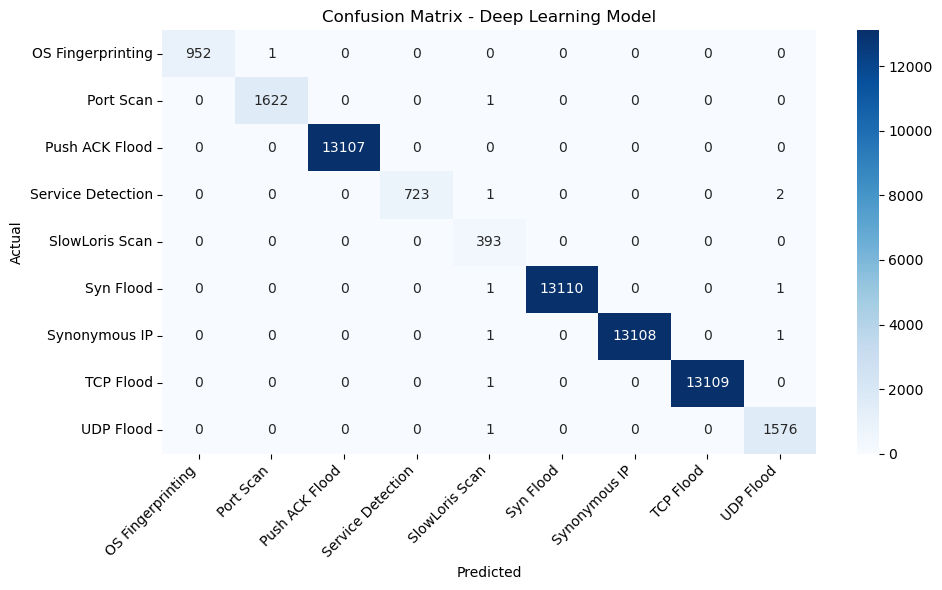

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {
    'ICMP Flood': ['Preprocessed_EVSE-A-charging-icmp-flood.csv'],
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv'],
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv'],
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv'],
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv'],
    'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv'],
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv'],
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv'],
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv'],
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],
}

# Function to load data
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

# Load and concatenate data
data_list = [load_data(file_list, label) for label, file_list in files.items()]
if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")
data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

# Separate features and labels
label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

# Drop empty columns
data = data.dropna(axis=1, how='all')

# Handle missing values
imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

# Encode labels
X = data.drop(columns=['Label'])
y = data['Label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the deep learning model
print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
y_pred = np.argmax(dl_model.predict(X_test), axis=1)
eval_results = dl_model.evaluate(X_test, y_test, verbose=2)

print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")

# Ensure target_names only includes present labels
unique_labels = np.unique(y_test)
valid_target_names = [le.classes_[label] for label in unique_labels]

# Generate the classification report with correct labels
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
24185/24185 - 92s - 4ms/step - accuracy: 0.9617 - loss: 0.0817 - val_accuracy: 0.9646 - val_loss: 0.0915
Epoch 2/10
24185/24185 - 95s - 4ms/step - accuracy: 0.9656 - loss: 0.0668 - val_accuracy: 0.9689 - val_loss: 0.4712
Epoch 3/10
24185/24185 - 88s - 4ms/step - accuracy: 0.9668 - loss: 0.0644 - val_accuracy: 0.9699 - val_loss: 0.0954
Epoch 4/10
24185/24185 - 86s - 4ms/step - accuracy: 0.9676 - loss: 0.0625 - val_accuracy: 0.9615 - val_loss: 0.1529
Epoch 5/10
24185/24185 - 95s - 4ms/step - accuracy: 0.9680 - loss: 0.0619 - val_accuracy: 0.9648 - val_loss: 0.0924
Epoch 6/10
24185/24185 - 90s - 4ms/step - accuracy: 0.9687 - loss: 0.0604 - val_accuracy: 0.9663 - val_loss: 0.0682
Epoch 7/10
24185/24185 - 89s - 4ms/step - accuracy: 0.9687 - loss: 0.0605 - val_accuracy: 0.9715 - val_loss: 0.0672
Epoch 8/10
24185/24185 - 87s - 4ms/step - accuracy: 0.9691 - loss: 0.0599 - val_accuracy: 0.9712 - val_loss: 0.0774
Epoch 9/10
24185/24185 - 90s - 4ms/step - accuracy: 0.9695 - loss: 0.059

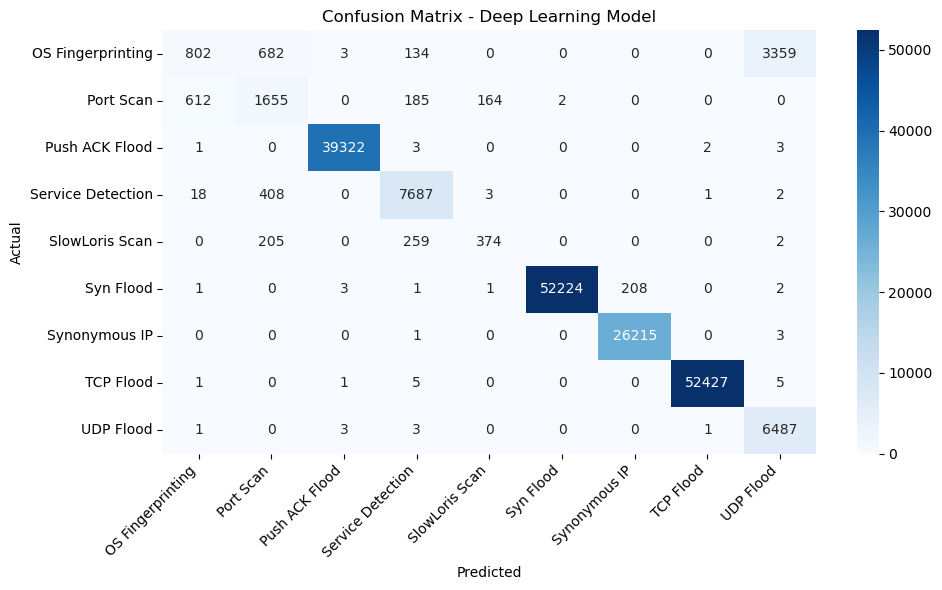

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {

    
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv',
                  'Preprocessed_EVSE-B-charging-tcp-flood.csv',
                  'Preprocessed_EVSE-A-idle-tcp-flood.csv',
                  'Preprocessed_EVSE-B-idle-tcp-flood.csv'],
    
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv',
                  'Preprocessed_EVSE-B-charging-udp-flood.csv',
                  'Preprocessed_EVSE-A-idle-udp-flood.csv',
                  'Preprocessed_EVSE-B-idle-udp-flood.csv'],
    
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-charging-os-flood.csv',
                          'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-idle-os-flood.csv'],
    
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv',
                  'Preprocessed_EVSE-B-charging-portscan.csv',
                  'Preprocessed_EVSE-A-idle-portscan.csv',
                  'Preprocessed_EVSE-B-idle-portscan.csv'],

        'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv',
                           'Preprocessed_EVSE-B-charging-push-ack-flood.csv'],
    
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv',
                          'Preprocessed_EVSE-B-charging-service-detection.csv'],
    
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
                       'Preprocessed_EVSE-B-charging-slowLoris-scan.csv'],
    
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv',
                  'Preprocessed_EVSE-B-charging-syn-flood.csv'],
    
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv'],
}

# Function to load data
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

# Load and concatenate data
data_list = [load_data(file_list, label) for label, file_list in files.items()]
if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")
data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

# Separate features and labels
label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

# Drop empty columns
data = data.dropna(axis=1, how='all')

# Handle missing values
imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

# Encode labels
X = data.drop(columns=['Label'])
y = data['Label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the deep learning model
print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
y_pred = np.argmax(dl_model.predict(X_test), axis=1)
eval_results = dl_model.evaluate(X_test, y_test, verbose=2)

print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")

# Ensure target_names only includes present labels
unique_labels = np.unique(y_test)
valid_target_names = [le.classes_[label] for label in unique_labels]

# Generate the classification report with correct labels
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




Training Deep Learning Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23773/23773 - 101s - 4ms/step - accuracy: 0.9797 - loss: 0.0513 - val_accuracy: 0.9843 - val_loss: 0.0676
Epoch 2/10
23773/23773 - 98s - 4ms/step - accuracy: 0.9833 - loss: 0.0377 - val_accuracy: 0.9869 - val_loss: 0.0761
Epoch 3/10
23773/23773 - 94s - 4ms/step - accuracy: 0.9845 - loss: 0.0351 - val_accuracy: 0.9799 - val_loss: 0.0560
Epoch 4/10
23773/23773 - 92s - 4ms/step - accuracy: 0.9855 - loss: 0.0333 - val_accuracy: 0.9831 - val_loss: 0.0605
Epoch 5/10
23773/23773 - 101s - 4ms/step - accuracy: 0.9860 - loss: 0.0322 - val_accuracy: 0.9791 - val_loss: 0.0585
Epoch 6/10
23773/23773 - 96s - 4ms/step - accuracy: 0.9866 - loss: 0.0310 - val_accuracy: 0.9883 - val_loss: 0.1038
Epoch 7/10
23773/23773 - 95s - 4ms/step - accuracy: 0.9870 - loss: 0.0305 - val_accuracy: 0.9900 - val_loss: 0.0722
Epoch 8/10
23773/23773 - 90s - 4ms/step - accuracy: 0.9873 - loss: 0.0298 - val_accuracy: 0.9895 - val_loss: 0.0565
Epoch 9/10
23773/23773 - 98s - 4ms/step - accuracy: 0.9878 - loss: 0.0

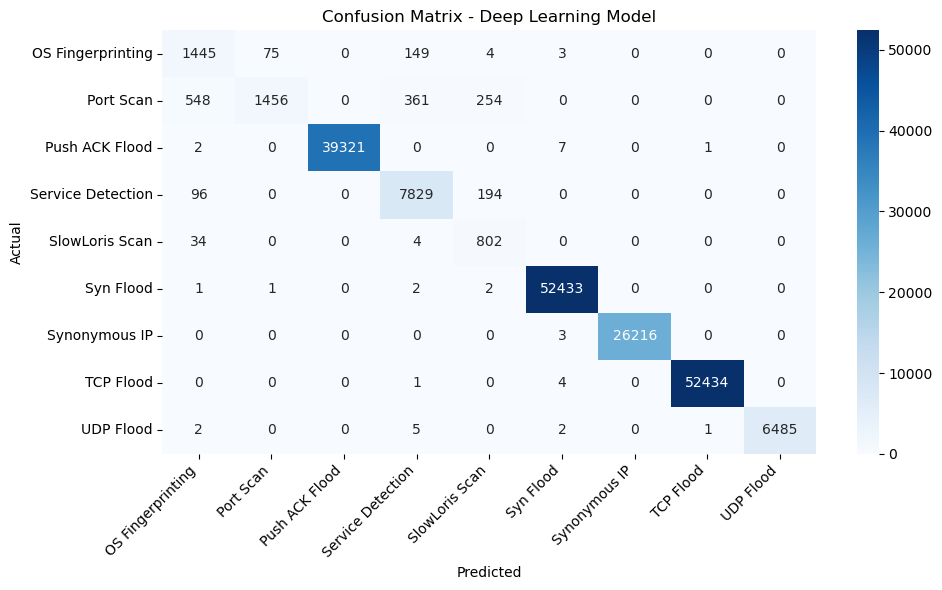

In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset directory
dataset_dir = r'J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Network Traffic\EVSE-A\csv\preprocessing'

files = {

    
    'TCP Flood': ['Preprocessed_EVSE-A-charging-tcp-flood.csv',
                  'Preprocessed_EVSE-B-charging-tcp-flood.csv',
                  'Preprocessed_EVSE_B_PowerCombined-tcp.csv'
                  'Preprocessed_EVSE-B-idle-tcp-flood.csv',
                 ],
    
    'UDP Flood': ['Preprocessed_EVSE-A-charging-udp-flood.csv',
                  'Preprocessed_EVSE_B_PowerCombined-udp.csv',
                  'Preprocessed_EVSE-A-idle-udp-flood.csv',
                  'Preprocessed_EVSE-B-idle-udp-flood.csv'],
    
    'OS Fingerprinting': ['Preprocessed_EVSE-A-charging-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-charging-os-flood.csv',
                          'Preprocessed_EVSE-A-idle-os-fingerprinting.csv',
                          'Preprocessed_EVSE-B-idle-os-flood.csv',
                          'Preprocessed_EVSE_B_PowerCombined-os.csv',
                         ],
    
    'Port Scan': ['Preprocessed_EVSE-A-charging-portscan.csv',
                  'Preprocessed_EVSE_B_PowerCombined-PortScan.csv'
                  'Preprocessed_EVSE-A-idle-portscan.csv',
                  'Preprocessed_EVSE-B-idle-portscan.csv'],

        'Push ACK Flood': ['Preprocessed_EVSE-A-charging-push-ack-flood.csv',
                           'Preprocessed_EVSE_B_PowerCombined-push-ack-flood.csv'
                           'Preprocessed_EVSE-A-idle-push-ack-flood.csv',
                           'Preprocessed_EVSE-B-idle-push-ack-flood.csv'],
    
    'Service Detection': ['Preprocessed_EVSE-A-charging-service-detection.csv',
                          'Preprocessed_EVSE-B-charging-service-detection.csv',
                          'Preprocessed_EVSE-A-idle-service-detection.csv',
                          'Preprocessed_EVSE-B-idle-service-detection.csv'],
    
    'SlowLoris Scan': ['Preprocessed_EVSE-A-charging-slowLoris-scan.csv',
                        'Preprocessed_EVSE_B_PowerCombined-slowLoris-scan.csv'
                       'Preprocessed_EVSE-A-idle-slowLoris-scan.csv',
                       'Preprocessed_EVSE-B-idle-slowLoris-scan.csv'],
    
    'Syn Flood': ['Preprocessed_EVSE-A-charging-syn-flood.csv',
                  'Preprocessed_EVSE-B-charging-syn-flood.csv',
                  'Preprocessed_EVSE-A-idle-syn-flood.csv',
                  'Preprocessed_EVSE-B-idle-syn-flood.csv'],
    
    'Synonymous IP': ['Preprocessed_EVSE-A-charging-synonymous-ip.csv',
                      'Preprocessed_EVSE-B-charging-synonymous-ip.csv',
                      'Preprocessed_EVSE-A-idle-synonymous-ip.csv',
                      'Preprocessed_EVSE-B-idle-synonymous-ip.csv'],
}

# Function to load data
def load_data(files, label):
    dataframes = []
    for file in files:
        file_path = os.path.join(dataset_dir, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df['Label'] = label
            dataframes.append(df)
    
    if not dataframes:
        print(f"Warning: No data loaded for label '{label}'")
    
    return pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()

# Load and concatenate data
data_list = [load_data(file_list, label) for label, file_list in files.items()]
if not data_list:
    raise ValueError("No data was loaded! Check file paths and dataset existence.")
data = pd.concat(data_list, ignore_index=True)

if 'Label' not in data.columns:
    raise KeyError("The 'Label' column is missing from the dataset after loading.")

# Separate features and labels
label_column = data['Label']
data = data.select_dtypes(include=[np.number])
data['Label'] = label_column

# Drop empty columns
data = data.dropna(axis=1, how='all')

# Handle missing values
imputer = SimpleImputer(strategy="median")
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

data.dropna(subset=['Label'], inplace=True)

# Encode labels
X = data.drop(columns=['Label'])
y = data['Label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deep Learning Model
def build_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the deep learning model
print("\nTraining Deep Learning Model...")
dl_model = build_dl_model(X_train.shape[1], len(np.unique(y_train)))
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
y_pred = np.argmax(dl_model.predict(X_test), axis=1)
eval_results = dl_model.evaluate(X_test, y_test, verbose=2)

print(f"\nDeep Learning Model Accuracy: {eval_results[1]:.4f}")

# Ensure target_names only includes present labels
unique_labels = np.unique(y_test)
valid_target_names = [le.classes_[label] for label in unique_labels]

# Generate the classification report with correct labels
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=valid_target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_target_names, yticklabels=valid_target_names)
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

